# HW2_1 - Probability Distributions 1 and 2

Learning contents:

1. Frequenist's approach
    - Bernoulli distribution function
    - Maximum Likelihood
    - Display distribution
2. Bayesian approach
    - Binomial distribution
    - Display Binomial distribution for different m
    - Maximum posterior
3. Multinomial variables
    - Generate data
    - Frequenist's approach
        - Multinomial Bernoulli distribution function
        - Maximum likelihood
    - Bayesian approach
        - Maximum posterior
4. Gaussian distribution
    - Distribution function
    - Generate data
    - Display data
    - Frequenist's approach
        - Maximum likelihood
        - Display distribution
    - Bayesian approach
        - Generate data
        - Variance is known, mean is unknown
        - Display mean estimation for different N

## Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import exp, sqrt
from collections import Counter
from scipy.special import comb
from scipy.stats import beta
from scipy.stats import multivariate_normal, norm

import seaborn as sns; sns.set(); sns.set_palette('bright')

## Generate Data

In [2]:
random.seed(2605)

def weighted_coin(heads=0.7, tails=0.3):
    total = heads + tails
    value = random.random() * total
    result = 0 if value <= tails else 1
    return result


def generate_data(size):
    return list(map(
        lambda i: weighted_coin(),
        range(size)
    ))


train_size = 26
train_data = generate_data(train_size)

<BarContainer object of 2 artists>

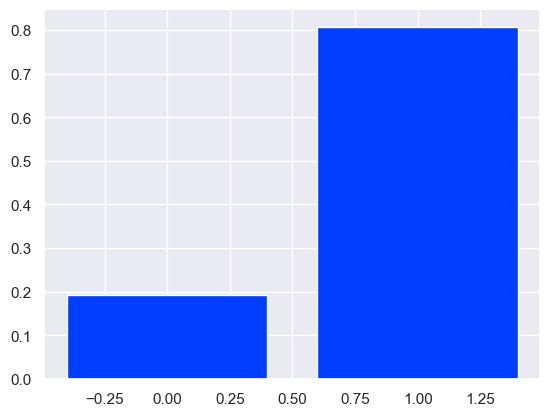

In [3]:
counter = Counter(train_data)
plt.bar(counter.keys(), list(map(lambda a: a / train_size, counter.values())))

## 1) Frequenist's approach

### 1.1) Bernoulli distribution function

In [4]:
def bern(x, mu):
    # Bernoulli distribution function 
    return mu**x * (1-mu)**(1-x)

### 1.2) Maximum Likelihood

`mu_maximum_likelihood_bern` takes data points `train_data` and should return Maximum Likelihood estimate of a Bernoulli distribution

In [5]:
def mu_maximum_likelihood_bern(train_data):
    # Maximum Likelihood estimate of a Bernoulli distribution
    m = sum(train_data)
    N = len(train_data)
    return m / N

mu_ml = mu_maximum_likelihood_bern(train_data)

### 1.3) Display distribution

In [6]:
def display_bernoulli(mu, color='b'):

    xs = np.linspace(0., 1., 100)
    ys = list(map(
        lambda x: bern(x, mu),
        xs
    ))

    plt.plot(xs,ys, '-' + color)

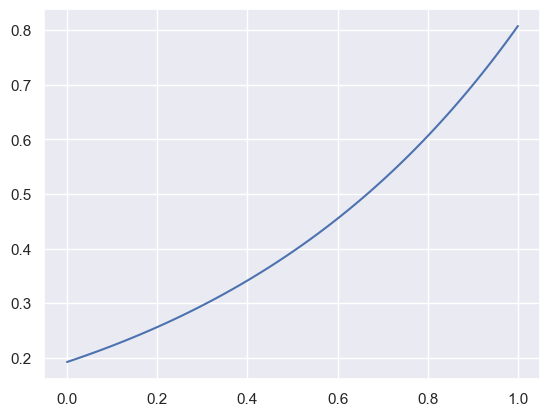

In [7]:
display_bernoulli(mu_ml)

## 2) Bayesian approach

### 2.1) Binomial distribution

In [8]:
def binomial(m, N, mu):
    # Binomial distribution
    return comb(N, m) * (mu**m) * ((1 - mu)**(N-m))

### 2.2) Display Binomial distribution for different m

In [9]:
def display_binomial(N, mu):
    xs = list(range(N))
    ys = list(map(
        lambda m: binomial(m, N, mu),
        xs
    ))
    
    plt.bar(xs, ys)

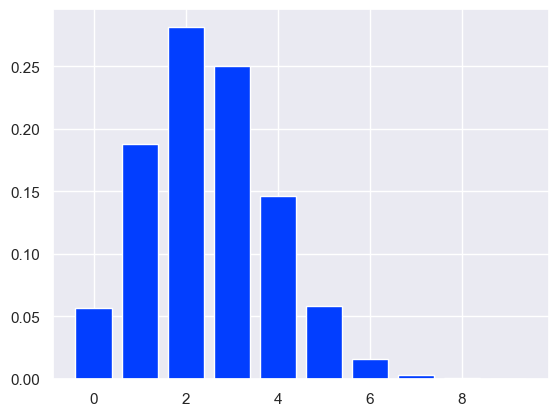

In [10]:
display_binomial(10, 0.25)

### 2.3) Maximum posterior

`mu_maximum_posterior_bern` takes `m`, `N`, `a`, `b` and should return Maximum Posterior estimate of a Bernoulli distribution. Posterior distribution is in form of a Beta distribution.

In [11]:
def mu_maximum_posterior_bern(m, N, a, b):
    # Maximum Posterior estimate of a Bernoulli distribution. Posterior distribution is in form of a Beta distribution.
    return (m + a - 1) / (N + a + b - 2)

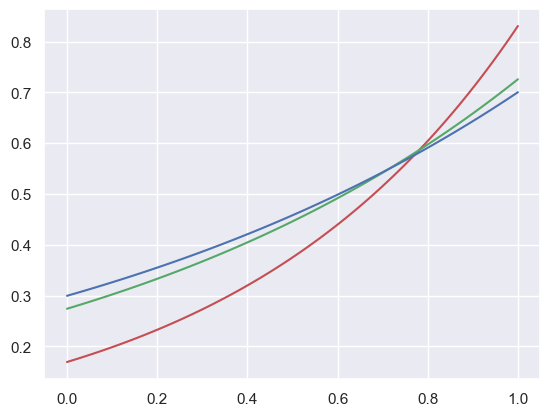

In [12]:
display_bernoulli(
    mu_maximum_posterior_bern(sum(train_data), train_size, 0.1, 0.1), 'r'
)
display_bernoulli(
    mu_maximum_posterior_bern(sum(train_data), train_size, 70, 30), 'g'
)
display_bernoulli(
    mu_maximum_posterior_bern(sum(train_data), train_size, 7000, 3000), 'b'
)

## 3) Multinomial variables

### 3.1) Generate data

In [13]:
np.random.seed(26)

def generate_multinomial_data(size, probabilities):
    numbers = np.random.choice(len(probabilities), size, probabilities)
    
    result = np.zeros((numbers.size, len(probabilities)))
    result[np.arange(numbers.size), numbers] = 1
    return result
    
probabilities=[0.5, 0.1, 0.2, 0.1, 0.1]
multinomial_data = generate_multinomial_data(26, probabilities)
multinomial_data

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

### 3.2) Frequenist's approach

#### 3.2.1) Multinomial Bernoulli distribution function

In [14]:
def bern_multi(xs, mus):
    # Multinomial Bernoulli distribution function
    return np.prod(mus**xs * (1 - mus)**(1 - xs), axis=1)

#### 3.2.2) Maximum likelihood

`mu_maximum_likelihood_multinomial_bern` takes multinomial data points `multinomial_data` and should return Maximum Likelihood estimate of a Multinomial Bernoulli distribution

In [15]:
def mu_maximum_likelihood_multinomial_bern(multinomial_data):
    # Maximum Likelihood estimate of a Multinomial Bernoulli distribution
    return multinomial_data.mean(axis=0)

multi_mu_ml = mu_maximum_likelihood_multinomial_bern(multinomial_data)
multi_mu_ml

array([0.19230769, 0.11538462, 0.23076923, 0.23076923, 0.23076923])

### 3.3) Bayesian approach

#### 3.3.1) Maximum posterior

`multinomial_mu_maximum_posterior_bern` takes multinomial data points `ms`, number of points `N`, data about prior belief `alphas` and should return Maximum Posterior estimate of a Multinomial Bernoulli distribution

In [16]:
def multinomial_mu_maximum_posterior_bern(ms, N, alphas):
    # Maximum Posterior estimate of a Multinomial Bernoulli distribution
    return (ms + np.array(alphas) - 1) / (N + sum(alphas) - len(alphas))

ms = list(map(lambda k: sum(multinomial_data[:, k]), range(len(multinomial_data[0]))))

In [17]:
print(multinomial_mu_maximum_posterior_bern(ms, len(multinomial_data), [5, 1, 2, 1, 1]))
print(multinomial_mu_maximum_posterior_bern(ms, len(multinomial_data), [50, 10, 20, 10, 10]))
print(multinomial_mu_maximum_posterior_bern(ms, len(multinomial_data), [500, 100, 200, 100, 100]))

[0.29032258 0.09677419 0.22580645 0.19354839 0.19354839]
[0.44628099 0.09917355 0.20661157 0.12396694 0.12396694]
[0.49363369 0.09990206 0.20078355 0.10284035 0.10284035]


In [18]:
print(probabilities)

[0.5, 0.1, 0.2, 0.1, 0.1]


## 4) Gaussian distribution

### 4.1) Distribution function

In [19]:
def multi_gaussian(x, mean, covariance):
    # Multivariate Gaussian distribution function
    dist = multivariate_normal(mean, covariance)
    return dist.pdf(x)

### 4.2) Generate data

In [20]:
def generate_multi_gaussian_data(size, mean, covariance):
    return np.array(multivariate_normal(mean=mean, cov=covariance).rvs(size=size, random_state=26))

target_mean = [1.7, -4]
target_cov = [[1, 0.1], [0.1, 1]]
multi_gaussian_data = generate_multi_gaussian_data(50, target_mean, target_cov)

### 4.3) Display data

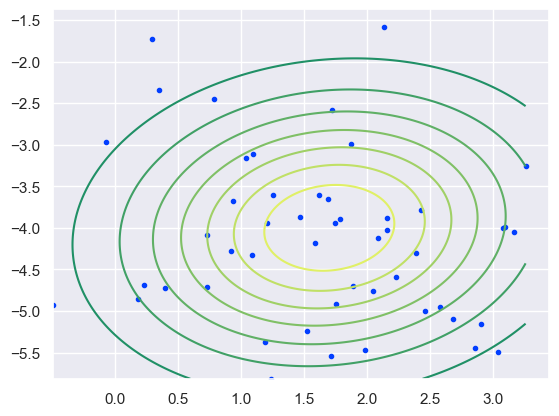

In [21]:
plt.plot(multi_gaussian_data[:, 0], multi_gaussian_data[:, 1], '.')

def display_gaussian_contour(data, mean, covariance, cmap='summer'):

    lx = min(data[:, 0])
    rx = max(data[:, 0])
    by = min(data[:, 1])
    uy = max(data[:, 1])

    x, y = np.mgrid[lx:rx:.01, by:uy:.01]
    pos = np.dstack((x, y))
    plt.contour(x, y, multivariate_normal(mean, covariance).pdf(pos), cmap=cmap)

display_gaussian_contour(multi_gaussian_data, target_mean, target_cov)

### 4.4) Frequenist's approach

#### 4.4.1) Maximum likelihood

`multi_gaussian_mu_maximum_likelihood` takes multinomial data points `multinomial_data` and should return Maximum Likelihood estimate of a mean of Multivariate Gaussian distribution

In [22]:
def multi_gaussian_mu_maximum_likelihood(multi_gaussian_data):
    # Maximum Likelihood estimate of a mean of Multivariate Gaussian distribution
    return np.mean(multi_gaussian_data, axis=0)

g_mu_ml = multi_gaussian_mu_maximum_likelihood(multi_gaussian_data)
g_mu_ml

array([ 1.64301733, -4.13747801])

`multi_gaussian_covariance_maximum_likelihood` takes multinomial data points `multinomial_data`, Maximum Likelihood for `mu` (`g_mu_ml`) and should return Maximum Likelihood estimate of a covariance of Multivariate Gaussian distribution

In [23]:
def multi_gaussian_covariance_maximum_likelihood(multi_gaussian_data, g_mu_ml):
    # Maximum Likelihood estimate of a covariance of Multivariate Gaussian distribution
    return np.cov(multi_gaussian_data.T, bias=True)

g_cov_ml = multi_gaussian_covariance_maximum_likelihood(multi_gaussian_data, g_mu_ml)
g_cov_ml

array([[ 0.8306221 , -0.18058579],
       [-0.18058579,  0.95533279]])

#### 4.4.2) Display distribution

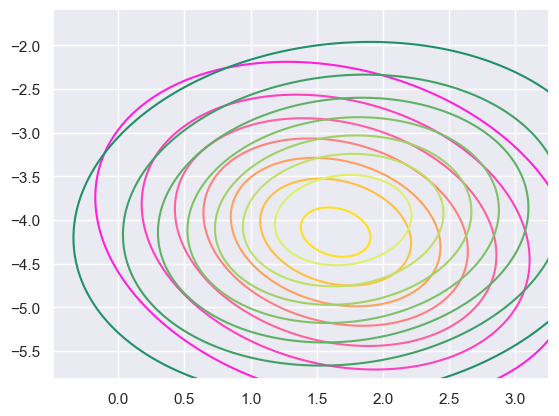

In [24]:
display_gaussian_contour(multi_gaussian_data, g_mu_ml, g_cov_ml, cmap='spring')
display_gaussian_contour(multi_gaussian_data, target_mean, target_cov, cmap='summer')

### 4.5) Bayesian approach

#### 4.5.1) Generate data

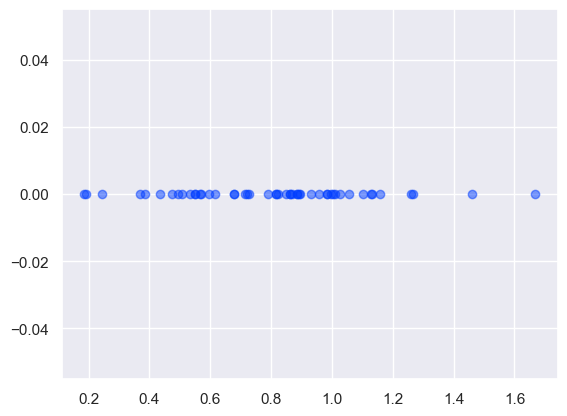

In [25]:
def generate_gaussian_data(size, mean, variance):
    return np.array(norm(mean, sqrt(variance)).rvs(size=size, random_state=26))

g_mean = 0.8
g_variance = 0.1
gaussian_data = generate_gaussian_data(50, g_mean, g_variance)

plt.scatter(gaussian_data, [0] * len(gaussian_data), alpha=0.5)

#### 4.5.2) Variance is known, mean is unknown

`multi_gaussian_mu_maximum_posterior` takes data points `gaussian_data`, prior `mu0` and `variance0`, `variance` and should return Maximum Posterior estimate of a mean of Multivariate Gaussian distribution

In [26]:
def multi_gaussian_mu_maximum_posterior(gaussian_data, mu0, variance0, variance):
    # Maximum Posterior estimate of a mean of Multivariate Gaussian distribution
    N = len(gaussian_data)
    if N == 0:
        return mu0, variance0
    mu_data = np.mean(gaussian_data)
    mu_map = (mu0 / variance0 + N * mu_data / variance) / (1 / variance0 + N / variance)
    var_map = 1 / (1 / variance0 + N / variance)
    return mu_map, var_map

g_mu_map, g_mu_var_map = multi_gaussian_mu_maximum_posterior(gaussian_data, 0, g_variance, g_variance)
g_mu_map, g_mu_var_map

(0.7873049121325898, 0.00196078431372549)

#### 4.5.3) Display mean estimation for different N

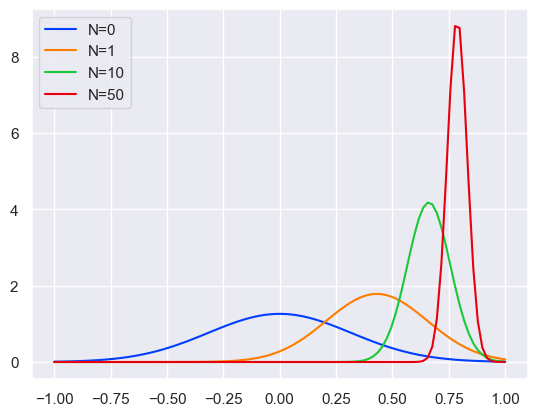

In [27]:
def display_mu_map(gaussian_data, mu0, variance0, variance):
    g_mu_map, g_mu_var_map = multi_gaussian_mu_maximum_posterior(gaussian_data, 0, g_variance, g_variance)
    x = np.linspace(-1, 1, 100)
    y = norm(g_mu_map, sqrt(g_mu_var_map)).pdf(x)
    plt.plot(x, y, label='N=' + str(len(gaussian_data)))
    plt.legend()

display_mu_map(gaussian_data[:0], 0, g_variance, g_variance)
display_mu_map(gaussian_data[:1], 0, g_variance, g_variance)
display_mu_map(gaussian_data[:10], 0, g_variance, g_variance)
display_mu_map(gaussian_data, 0, g_variance, g_variance)